## Aplicación de la estadística descriptica en la ingeniería de confiabilidad.

Para facilitar el aprendizaje de la teoría aquí planteada realizaremos un ejercicio con datos reales de parámetros que caracterizan los yacimientos de crudo. Esta data se utilizará a lo largo de las diferentes etapas de desarrollo de los ejercicios prácticos.

***Contrucción de Histograma de frecuencia***

Para mostrar la aplicabilidad de Python en la estadística descriptiva, analizaremos los resultados de porosidad de 99 yacimientos reales con el fin de realizar un análisis completo de la información suministrada.

In [1]:
# Importamos las librerías necesarias para el trabajo con los datos
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math as mth

In [2]:
# Importamos los datos del yacimiento

DATA = pd.read_csv("EJERCICIO 1.csv")
DATA.head(10)

,POROSIDAD,ARENA
0,0.2370,130.293
1,0.2266,37.000
2,0.2179,41.037
3,0.2240,52.500
4,0.2319,86.092
5,0.2400,43.223
6,0.2413,56.500
7,0.2436,24.035
8,0.2331,35.963
9,0.2376,35.864


In [3]:
#Aislamos la data en una variable porosidad y una para arena definimos el total de elementos de la serie
porosidad = DATA["POROSIDAD"]

**1. Histograma de frecuencia**

El histograma de frecuencias nos permite contestar preguntas como:

¿Cuál es la probabilidad de que X tome un determinado valor xi?
¿Cuál es el valor o el rango de valores de X con mayor probabilidad de ocurrencia?
¿De qué manera se distribuyen los probables valores de X?

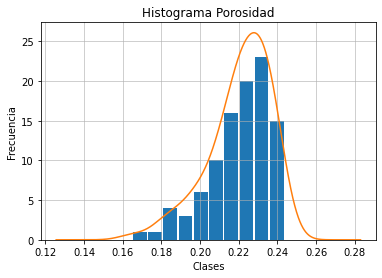

In [4]:
# Llamamos la funcion hist de la biblioteca matplotlib.pyplot que importamos al inicio

# bins = auto para dejar que la libreria haga el calculo del numero de clases y podamos comparlo
# rwidth = 0.9 para que las barras del grafico queden separadas una de la otra
plt.hist(porosidad, bins="auto" , rwidth=0.9)
# plot.kde - kernel density equivalent realiza una grafica ajustada al comportamiento de los datos, por el momento no 
# profundizaremos en este tema
porosidad.plot.kde(bw_method='silverman')
plt.title("Histograma Porosidad")
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
# el parametro de aplpha = 0.75 se pone para visualizar una rejilla en la grafica
plt.grid(alpha=0.75)

**2 . Histograma Avanzado**

Como podemos observar el histograma por sí solo no nos proporciona mayor información respecto a la distribución de los datos. La aplicación de esta librería retorna una información que podremos utilizar para el análisis de la información, pero debe ser extraída y manipulada manualmente. Pueden encontrar mayor información sobre la librería en la siguiente dirección: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

Para facilitar el análisis procederemos a crear una función que construya la misma grafica pero que exporte la información en forma de tabla con el fin de realizar el análisis de la distribución de los datos.


In [5]:
# A continuacion se define una funcion para construir el histrograma de frecuencia, con el objetivo de exporta una tabla de 
# resultados para su posterior analisis. 

def histo_frec(data, nombre):
    #Definimos variables globales, esta variable sera el dataframe que contendra la tabla de resultados del histrograma
    global matrix_frame_frec
    # Definimos la cantidad de elementos
    cant_elemt = data.count()
    # Definimos el numero de clases
    k = round(mth.sqrt(cant_elemt))
       
    # Definimos parametros basicos del histograma, tanto por puntos como por densidad de poblacion
    n, bins = np.histogram(data, bins=k)
    m, bins2 = np.histogram(data, bins=k, density=True)
    
    # Creamos variable para almacenar las clases
    clases=[]
    # Creamos variable para almacenar la tabla de resultados
    matrix =[]
    #Calculamos la probabilida de ocurrencia de los eventos
    prob =n/cant_elemt
    # Construimos el array de clases
    for i in range(0,k):
        par_val=(round(bins[i],4),round(bins[i+1],4))
        clases.append(par_val)
    # Construmios la tabla de datos almacenandola en la matrix
    for i in range(0,k):
        diccionario ={"Clases":clases[i],"# Puntos":n[i],"Probabilidad":round(prob[i],4), "Densidad":m[i]}
        matrix.append(diccionario)
    matrix_frame_frec = pd.DataFrame(matrix)
    
    #Construimos el histograma
    plt.hist(data, bins=k , density = True, rwidth=0.9)
    data.plot.kde(bw_method='silverman')
    plt.title(nombre)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.75)
    
    
    return plt.show(), matrix_frame_frec

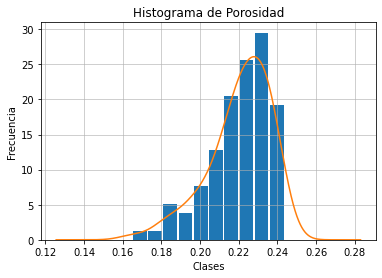

(None,
              Clases  # Puntos  Probabilidad   Densidad
 0  (0.1649, 0.1728)         1        0.0101   1.283483
 1  (0.1728, 0.1806)         1        0.0101   1.283483
 2  (0.1806, 0.1885)         4        0.0404   5.133931
 3  (0.1885, 0.1964)         3        0.0303   3.850449
 4  (0.1964, 0.2042)         6        0.0606   7.700897
 5  (0.2042, 0.2121)        10        0.1010  12.834829
 6    (0.2121, 0.22)        16        0.1616  20.535726
 7    (0.22, 0.2279)        20        0.2020  25.669657
 8  (0.2279, 0.2357)        23        0.2323  29.520106
 9  (0.2357, 0.2436)        15        0.1515  19.252243)

In [6]:
# Ejecutamos la funcion histo_frec y le pasamos la data porosidad y el nombre que le pondremos a la grafica.
histo_frec(porosidad, "Histograma de Porosidad")

***3. Analisis del histrograma de frecuencias***

Del histograma de frecuencias construido para la variable aleatoria “Porosidad” podemos inferir lo siguiente:

1. p(Poro = 0.21 micras ) = 10.10 %  (probabilidad de que la porosidad tome el valor de 0,21 micras )
2. p(Poro = 0.22 micras ) = 16.16 % (probabilidad de que la porosidad tome el valor de 0,22 micras
3. p(0.2279 ≤ P < 0.2357  micras) = 23.23% (probabilidad de que la porosidad tome valores mayores o iguales a 0.2279 micras y menores de 0.2357 micras )
4. El 43% de probabilidad de ocurrencia está ubicado en el rango que va desde 0.22 hasta 0.2357 micras

**4. Literatura utilizada**

Para la elaboración del presente documento se utilizaron muchas fuentes bibliográficas pero en especial las siguientes:

Libros:
 * Confiabilidad Integral, un enfoque práctico, R2M S.A
 
 Artículos:
 * Python Statistics Fundamentals: How to Describe Your Data - https://realpython.com/python-statistics/
 
 Documentación:
 * Toda la documentación de las librerías de SciPy - https://www.scipy.org/docs.html


_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
javier8am@yahoo.com
Bogotá – Colombia_  